# Векторный потенциал электростатического поля точечного заряда

$\vec{E} = \frac{q}{r^2}\frac{\vec{r}}{r} = \frac{q}{r^3}\vec{r}$

$\vec{r}=\left(\begin{array}{c}
    x \\
    y \\
    z \\
\end{array}\right)$

$r^3 = \left(x^2+y^2+z^2\right)^{\frac{3}{2}}$

$\vec{E}=\left(\begin{array}{c}
    E_x \\
    E_y \\
    E_z \\
\end{array}\right)=\left(\begin{array}{c}
    \frac{x}{\left(x^2+y^2+z^2\right)^{\frac{3}{2}}} \\
    \frac{y}{\left(x^2+y^2+z^2\right)^{\frac{3}{2}}} \\
    \frac{z}{\left(x^2+y^2+z^2\right)^{\frac{3}{2}}} \\
\end{array}\right)$

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
Eu.<x,y,z> = EuclideanSpace()

In [3]:
cartesian = Eu.cartesian_coordinates()
cartesian

Chart (E^3, (x, y, z))

In [4]:
spherical.<r,th,ph> = Eu.spherical_coordinates()
spherical

Chart (E^3, (r, th, ph))

In [5]:
cylindrical.<rh,ph,z> = Eu.cylindrical_coordinates()
cylindrical

Chart (E^3, (rh, ph, z))

In [6]:
x0, y0, z0 = var("x_0, y_0, z_0")
assume(x0, "real")
assume(y0, "real")
assume(z0, "real")

q = var("q")

In [7]:
x0 = 0
y0 = 0
z0 = 0

In [8]:
q = 1

In [9]:
r = Eu.vector_field(x, y, z, name='r')
disp(r.display())

<IPython.core.display.Math object>

In [10]:
disp(r.norm().display())

<IPython.core.display.Math object>

In [11]:
E = q * r / (r.norm())^3

In [12]:
disp(E.display())

<IPython.core.display.Math object>

In [13]:
disp(E.display(spherical))

<IPython.core.display.Math object>

Покажем, что $\vec{E} = rot\vec{A}$, то есть существует $\vec{A}=\left(\begin{array}{c}
    A_x (x,y,z) \\
    A_y (x,y,z)\\
    A_z (x,y,z)\\
\end{array}\right)$ для которого

$$\vec{E}=\left(\begin{array}{c}
    E_x \\
    E_y \\
    E_z \\
\end{array}\right)=\left[\begin{array}{ccc}
    \vec{i} & \vec{j} & \vec{k}\\
    \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z}\\
    A_{x} & A_{y} & A_{z}\\
\end{array}\right] = \left(\begin{array}{c}
    \frac{\partial A_z}{\partial y} - \frac{\partial A_y}{\partial z} \\
    \frac{\partial A_x}{\partial z} - \frac{\partial A_z}{\partial x} \\
    \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} \\
\end{array}\right)$$

Нужно указать хотя бы одно решение. Будем искать $\vec{A}\left(\vec{r}\right)$, полагая $A_z = 0$

$$\vec{E}=\left(\begin{array}{c}
    E_x \\
    E_y \\
    E_z \\
\end{array}\right) = \left(\begin{array}{c}
    - \frac{\partial A_y}{\partial z} \\
    \frac{\partial A_x}{\partial z} \\
    \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} \\
\end{array}\right)$$

$$\left(\begin{array}{c}
    A_y = - \int\limits_{z_0}^{z} E_x (x,y,z) dz + \psi(x,y) \\
    A_x = \int\limits_{z_0}^{z} E_y (x,y,z) dz + \varphi(x,y)\\
    \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = E_z \\
\end{array}\right)$$

Подставляя $A_y$ и $A_x$ в третье соотношение

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y}
= \frac{\partial }{\partial x} \left(- \int\limits_{z_0}^{z} E_x (x,y,z) dz + \psi(x,y)\right)
- \frac{\partial }{\partial y} \left( \int\limits_{z_0}^{z} E_y (x,y,z) dz + \varphi(x,y) \right)$$

$$E_z
= - \int\limits_{z_0}^{z} \frac{\partial E_x}{\partial x} dz + \frac{\partial \psi(x,y)}{\partial x} 
- \int\limits_{z_0}^{z} \frac{\partial E_y}{\partial y} dz - \frac{\partial \varphi(x,y)}{\partial y}$$

Учтём, что 

$$-\int\limits_{z_0}^{z} \left(\frac{\partial E_x}{\partial x} + 
\frac{\partial E_y}{\partial y} \right)\,dz =
-\int\limits_{z_0}^{z} \left(
\frac{\partial E_x}{\partial x} + 
\frac{\partial E_y}{\partial y} +
\frac{\partial E_z}{\partial z}
\right)\,dz 
+\int\limits_{z_0}^{z} \left(
\frac{\partial E_z}{\partial z}
\right)\,dz =
E_z(x,y,z) - E_z(x,y,z_0)
$$

Тогда

$$\frac{\partial \psi(x,y)}{\partial x} 
- \frac{\partial \varphi(x,y)}{\partial y} = E_z(x,y,z_0)$$

$$\vec{A}=\left(\begin{array}{c}
    A_x \\
    A_y \\
    A_z \\
\end{array}\right)=\left(\begin{array}{c}
    \int\limits_{z_0}^{z} E_y (x,y,z) \, dz + \varphi(x,y)\\
    - \int\limits_{z_0}^{z} E_x (x,y,z) \, dz + \psi(x,y) \\
    0 \\
\end{array}\right)$$

Полагая $\varphi(x,y) = 0$

$$\psi(x,y) = \int\limits_{x_0}^{x} E_z(x,y,z_0)\,dx$$

получаем

$$\vec{A}=\left(\begin{array}{c}
    A_x \\
    A_y \\
    A_z \\
\end{array}\right)=\left(\begin{array}{c}
    \int\limits_{z_0}^{z}E_y(x,y,z)\, dz \\
    \int\limits_{x_0}^{x}E_z(x,y,z_0)\, dx - \int\limits_{z_0}^{z}E_x(x,y,z)\, dz \\
    0 \\
\end{array}\right)$$

In [14]:
def recoverA(E, defint):
    Ex = E[1].expr()
    Ey = E[2].expr()
    Ez = E[3].expr()
    
    assume(z>0)
    assume(y>0)
    assume(x>0)
    
    if defint:
        Ax = Ey.integrate(z, z0, z)
        Ay = Ez.integrate(x, x0, x).subs(z == z0) - Ex.integrate(z, z0, z)
        Az = 0
    else:
        Ax = Ey.integrate(z)
        Ay = Ez.integrate(x).subs(z == z0) - Ex.integrate(z)
        Az = 0

    return Ax, Ay, Az

In [15]:
Ax, Ay, Az = recoverA(E, defint = True)

In [16]:
Ax, Ay, Az = recoverA(E, defint = False)

Таким образом векторный потенциал электростатического поля точечного заряда

In [17]:
disp(Ax)
disp(Ay)
disp(Az)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

делаем проверку, взяв ротор от полученного выражения векторного потенциала в соответствии с 

$$\vec{E}=\left(\begin{array}{c}
    E_x \\
    E_y \\
    E_z \\
\end{array}\right) = \left(\begin{array}{c}
    - \frac{\partial A_y}{\partial z} \\
    \frac{\partial A_x}{\partial z} \\
    \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} \\
\end{array}\right)$$

$E_x = - \frac{\partial A_y}{\partial z}$

displ("E_x = - \\frac{\\partial A_y}{\\partial z} = " + latex(-Ay.diff(z)))

$$E_x = - \frac{\partial A_y}{\partial z} = -\frac{x z^{2}}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} {\left(x^{2} + y^{2}\right)}} + \frac{x}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}}$$

$$E_x = - \frac{\partial A_y}{\partial z} = \left(-\frac{z^{2}}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} } + \frac{1}{ \sqrt{x^{2} + y^{2} + z^{2}}}\right)\frac{x}{ {\left(x^{2} + y^{2}\right)}}$$

$$E_x = - \frac{\partial A_y}{\partial z} = \left(-\frac{z^{2}}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} } + \frac{x^{2} + y^{2} + z^{2}}{ \left(x^{2} + y^{2} + z^{2}\right)^{\frac{3}{2}}}\right)\frac{x}{ {\left(x^{2} + y^{2}\right)}}$$

$$E_x = - \frac{\partial A_y}{\partial z} = \left( \frac{x^{2} + y^{2}}{ \left(x^{2} + y^{2} + z^{2}\right)^{\frac{3}{2}}}\right)\frac{x}{ {\left(x^{2} + y^{2}\right)}}$$

$$E_x = - \frac{\partial A_y}{\partial z} = \frac{x}{ \left(x^{2} + y^{2} + z^{2}\right)^{\frac{3}{2}}}$$

$E_y = \frac{\partial A_x}{\partial z}$

In [18]:
displ("E_y = \\frac{\\partial A_x}{\\partial z} = " + latex(Ax.diff(z)))

<IPython.core.display.Math object>

$$E_y = \frac{\partial A_x}{\partial z} = -\frac{y z^{2}}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} {\left(x^{2} + y^{2}\right)}} + \frac{y}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}}$$

$$E_y = \frac{\partial A_x}{\partial z} = \left(-\frac{z^{2}}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} } + \frac{1}{{\sqrt{x^{2} + y^{2} + z^{2}}}}\right) \frac{y}{ {\left(x^{2} + y^{2}\right)}}$$

$$E_y = \frac{\partial A_x}{\partial z} = \left(-\frac{z^{2}}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} } + \frac{x^{2} + y^{2} + z^{2}}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}}}\right) \frac{y}{ {\left(x^{2} + y^{2}\right)}}$$

$$E_y = \frac{\partial A_x}{\partial z} = \left(\frac{x^{2} + y^{2}}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}}}\right) \frac{y}{ {\left(x^{2} + y^{2}\right)}}$$

$$E_y = \frac{\partial A_x}{\partial z} = \frac{y}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}}}$$

$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y}$

In [19]:
displ("E_z = \\frac{\\partial A_y}{\\partial x} - \\frac{\\partial A_x}{\\partial y} = " + latex(Ay.diff(x) - Ax.diff(y)))

<IPython.core.display.Math object>

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = \frac{2 \, x^{2} z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}^{2}} + \frac{x^{2} z}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} {\left(x^{2} + y^{2}\right)}} + \frac{2 \, y^{2} z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}^{2}} + \frac{y^{2} z}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} {\left(x^{2} + y^{2}\right)}} - \frac{2 \, z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}}$$

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = \left(\frac{2 \, x^{2}}{ {x^{2} + y^{2}} } + \frac{x^{2}}{{x^{2} + y^{2} + z^{2}} } + \frac{2 \, y^{2}}{ {x^{2} + y^{2}}} + \frac{y^{2}}{{x^{2} + y^{2} + z^{2}} } - 2\right)  \frac{z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}}$$

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = \left(\frac{2 \, x^{2} + 2 \, y^{2}}{ {x^{2} + y^{2}} } + \frac{x^{2} + y^{2}}{{x^{2} + y^{2} + z^{2}} } - 2\right)  \frac{z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}}$$

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = \left(\frac{2 \, \left(x^{2} + y^{2}\right)}{ {x^{2} + y^{2}} } + \frac{x^{2} + y^{2}}{{x^{2} + y^{2} + z^{2}} } - 2\right)  \frac{z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}}$$

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = \left(2 + \frac{x^{2} + y^{2}}{{x^{2} + y^{2} + z^{2}} } - 2\right)  \frac{z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}}$$

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = \left( \frac{x^{2} + y^{2}}{{x^{2} + y^{2} + z^{2}} } \right)  \frac{z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}}$$

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = \frac{z}{{\left(x^{2} + y^{2} + z^{2}\right)}^{\frac{3}{2}} }$$

Итак, действительно, взятием ротора от векторного потенциала мы получаем выражение для электростатического поля точечного заряда

In [20]:
A_E = Eu.vector_field(Ax, Ay, Az, name='A_E')

In [21]:
disp(A_E.display(cartesian))

<IPython.core.display.Math object>

$$A = \left( \frac{y z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}} \right) e_{ x } + \left( -\frac{x z}{\sqrt{x^{2} + y^{2} + z^{2}} {\left(x^{2} + y^{2}\right)}} \right) e_{ y }$$

начинаем преобразование к цилиндрическим координатам

$$A = \left( \frac{y z}{{\rho^{2}}\sqrt{\rho^{2} + z^{2}} } \right) e_{ x } + \left( -\frac{x z}{{\rho^{2}}\sqrt{\rho^{2} + z^{2}} } \right) e_{ y }$$

<p>Закон преобразования координат от цилиндрических к декартовым:
</p>

$${\displaystyle {\begin{cases}x=\rho \cos \varphi ,\\y=\rho \sin \varphi ,\\z=z.\end{cases}}}$$

поэтому, далее имеем

$$A = \left( \frac{\sin \varphi z}{{\rho}\sqrt{\rho^{2} + z^{2}} } \right) e_{ x } + \left( -\frac{\cos \varphi z}{{\rho}\sqrt{\rho^{2} + z^{2}} } \right) e_{ y }$$

$$A = \left( \frac{ z}{{\rho}\sqrt{\rho^{2} + z^{2}} }\,\sin \varphi \right) e_{ x } + \left( -\frac{ z}{{\rho}\sqrt{\rho ^{2}+ z^{2}} } \,\cos \varphi \right) e_{ y }$$

$$A = \frac{ z}{{\rho}\sqrt{\rho^{2} + z^{2}} }\left( \sin \varphi \, e_{ x } -\cos \varphi \, e_{ y }\right)$$

<p>Орты цилиндрической системы координат связаны с декартовыми ортами следующими соотношениями:
</p>

$${\displaystyle {\begin{cases}{\vec {e}}_{\rho }=\cos \varphi \, {\vec {e}}_{x}+\sin \varphi \, {\vec {e}}_{y},\\{\vec {e}}_{\varphi }=-\sin \varphi \, {\vec {e}}_{x}+\cos \varphi \, {\vec {e}}_{y},\\{\vec {e}}_{z}={\vec {e}}_{z},\end{cases}}}$$

$$\vec A = -\frac{ z}{{\rho}\sqrt{\rho^{2} + z^{2}} }\,{\vec {e}}_{\varphi }$$

$$A = -\frac{ z}{{\rho}r }\,{\vec {e}}_{\varphi }$$

<p>Если заданы сферические координаты точки ${\displaystyle (r,\;\theta ,\;\varphi )}$, то переход к декартовым осуществляется по формулам:
</p>

$${\displaystyle {\begin{cases}x=r\sin \theta \cos \varphi ,\\y=r\sin \theta \sin \varphi ,\\z=r\cos \theta .\end{cases}}}$$

<p>Обратно, от декартовых к сферическим:
</p>

$${\displaystyle {\begin{cases}r={\sqrt {x^{2}+y^{2}+z^{2}}},\\\theta =\arccos {\dfrac {z}{\sqrt {x^{2}+y^{2}+z^{2}}}}=\mathrm {arctg} {\dfrac {\sqrt {x^{2}+y^{2}}}{z}},\\\varphi =\mathrm {arctg} {\dfrac {y}{x}}.\end{cases}}}$$

$$A_E = -\frac{1}{r \, tg \, \theta  }\,{\vec {e}}_{\varphi }$$

$$A_E = -\frac{сtg \, \theta}{r}\,{\vec {e}}_{\varphi }$$

$$A_E = -\frac{\cos \theta}{{\rho}}\,{\vec {e}}_{\varphi }$$

Проекция вектора $\vec{A}$ на $\vec e_{\varphi}$ орт в цилиндрических координатах (в единицах поля)

$A_{\varphi} = - \frac{A_x}{sin(\varphi)} = - \frac{A_x}{y}\sqrt{x^2+y^2}$

$A_{\varphi} = \frac{A_y}{cos(\varphi)} = \frac{A_y}{x}\sqrt{x^2+y^2}$

In [22]:
A_phi = -Ax/y*sqrt(x^2 + y^2)
disp(A_phi)

<IPython.core.display.Math object>

In [23]:
Aphi = A_phi.subs(x == sqrt(rh^2 - y^2))
disp(Aphi)

<IPython.core.display.Math object>

Вектор $\vec{A}(\rho, \varphi, z)$ в цилиндрических координатах

$A_{\varphi} = - \frac{A_x}{\rho sin(\varphi)} = - \frac{A_x}{y}$

$A_{\varphi} = \frac{A_y}{\rho cos(\varphi)} = \frac{A_y}{x}$

In [24]:
disp(A.display(cylindrical))

<IPython.core.display.Math object>

In [25]:
latex(A.display(cylindrical))

A = \left( -\frac{\sqrt{{\rho}^{2} + z^{2}} z}{{\rho}^{4} + {\rho}^{2} z^{2}} \right) \frac{\partial}{\partial {\phi} }

$$A = \left( -\frac{\sqrt{{\rho}^{2} + z^{2}} z}{{\rho}^{4} + {\rho}^{2} z^{2}} \right) \frac{\partial}{\partial {\phi} }$$

$$A = \left( -\frac{\sqrt{{\rho}^{2} + z^{2}} z}{{\rho}^{2} \left({\rho}^{2} + z^{2}\right)} \right) \frac{\partial}{\partial {\phi} }$$

$$A = \left( -\frac{z}{{\rho}^{2} \sqrt{{\rho}^{2} + z^{2}}} \right) \frac{\partial}{\partial {\phi} }$$

<p>Закон преобразования координат от декартовых к цилиндрическим:
</p>

$${\displaystyle {\begin{cases}\rho ={\sqrt {x^{2}+y^{2}}},\\\varphi =\mathrm {arctg} \left({\dfrac {y}{x}}\right),\\z=z.\end{cases}}}$$

In [26]:
A_phi = Ay/x
disp(A_phi)

<IPython.core.display.Math object>

In [27]:
Aphi = A_phi.subs(x == sqrt(rh^2 - y^2))
disp(Aphi)

<IPython.core.display.Math object>

Вектор $\vec{A}(r, \theta, \varphi)$ в сферических координатах

In [28]:
disp(A.display(spherical))

<IPython.core.display.Math object>

Проверяем, что $rot\vec{A_E} = \vec{E}$

In [29]:
from sage.manifolds.operators import *

In [30]:
curlA = curl(A)

In [31]:
disp(curlA.display())

<IPython.core.display.Math object>

In [32]:
disp((curlA-E).display())

<IPython.core.display.Math object>

In [33]:
curlAx = curlA[1].expr()
curlAy = curlA[2].expr()
curlAz = curlA[3].expr()

In [34]:
disp(curlAz.numerator().factor())

<IPython.core.display.Math object>

In [35]:
disp(curlAz.denominator().factor())

<IPython.core.display.Math object>

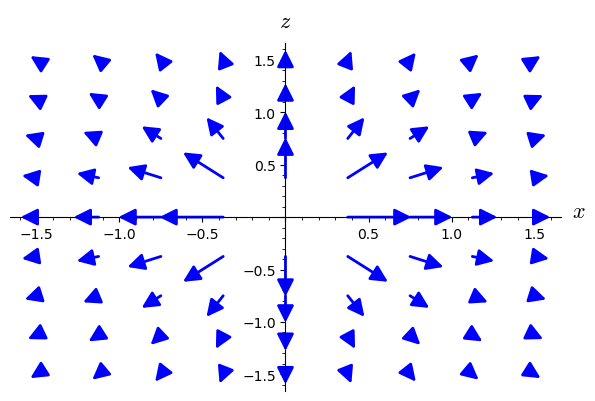

In [36]:
E.plot(fixed_coords={y: 0.5}, ambient_coords=(x,z), max_range=1.5,
       scale=0.25)

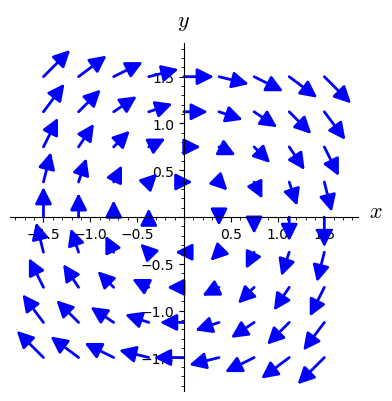

In [37]:
(A*(x^2+y^2)).plot(fixed_coords={z: 2.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

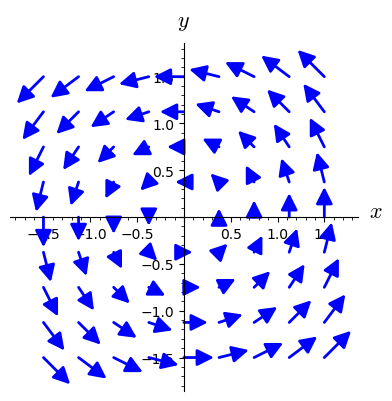

In [38]:
(A*(x^2+y^2)).plot(fixed_coords={z: -2.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

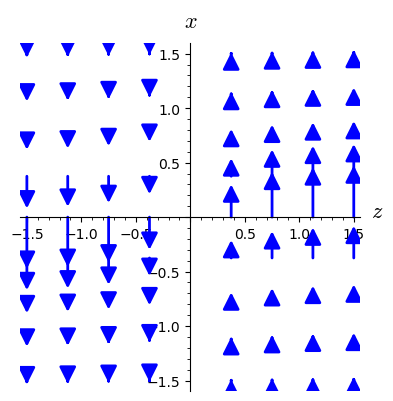

In [39]:
(A).plot(fixed_coords={y: 0.5}, ambient_coords=(z,x), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

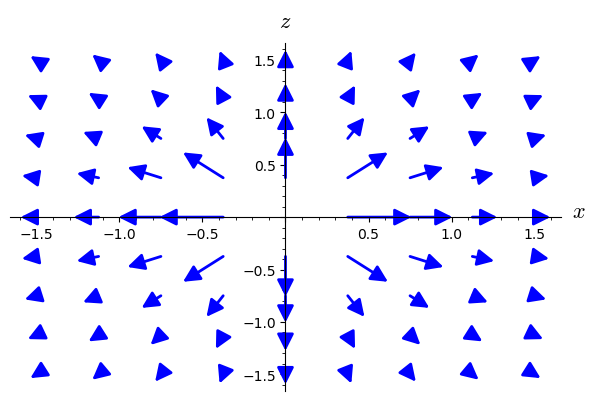

In [40]:
curlA.plot(fixed_coords={y: 0.5}, ambient_coords=(x,z), max_range=1.5,
       scale=0.25)

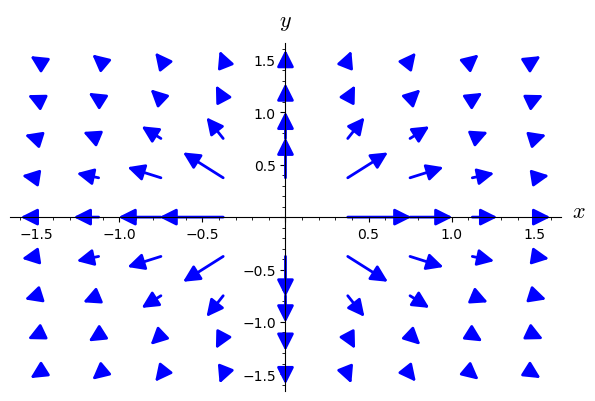

In [41]:
curlA.plot(fixed_coords={z: 0.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25)

Дивергенция векторного потенциала

In [42]:
div(A).display()

div(A): E^3 → ℝ
   (x, y, z) ↦ 0
   (r, th, ph) ↦ 0
   (rh, ph, z) ↦ 0

равна нулю, то есть поле векторного потенциала является соленоидальным, и потому можно попытаться восстановить векторный потенциал векторного потенциала, для которого 

$\vec E = rot\, \vec A = rot\,rot \vec {A_A}$

In [43]:
AAx, AAy, AAz = recoverA(A, defint = False)

In [44]:
disp(AAx)
disp(AAy)
disp(AAz)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [55]:
AAE = Eu.vector_field(AAx, AAy, AAz, name='A_{A_E}')
disp(AAE.display())

<IPython.core.display.Math object>

Дивергенция векторного потенциала векторного потенциала уже не равна нулю поэтому поле векторного потенциала векторного потенциала уже не является соленоидальным, поэтому на этом этапе продедура восстановления векторных потенциалов останавливается

In [57]:
disp(div(AAE).display())

<IPython.core.display.Math object>

$$A_{A_E} = -\frac{x\sqrt{x^2 + y^2 + z^2}}{x^2 + y^2} e_x - \frac{y\sqrt{x^2 + y^2 + z^2}}{x^2 + y^2} e_y$$

начинаем преобразование к цилиндрическим координатам

$$A_{A_E} = -\frac{x\sqrt{\rho^{2} + z^2}}{\rho^{2}} e_x - \frac{y\sqrt{\rho^{2} + z^2}}{\rho^{2}} e_y$$

<p>Закон преобразования координат от цилиндрических к декартовым:
</p>

$${\displaystyle {\begin{cases}x=\rho \cos \varphi ,\\y=\rho \sin \varphi ,\\z=z.\end{cases}}}$$

поэтому, далее имеем

$$A_{A_E} = -\frac{\rho \cos \varphi\sqrt{\rho^{2} + z^2}}{\rho^{2}} e_x - \frac{\rho \sin \varphi\sqrt{\rho^{2} + z^2}}{\rho^{2}} e_y$$

$$A_{A_E} = -\left(\frac{\cos \varphi\sqrt{\rho^2 + z^2}}{\rho} e_x + \frac{\sin \varphi\sqrt{\rho^{2} + z^2}}{\rho} e_y\right)$$

$$A_{A_E} = -\frac{\sqrt{\rho^2 + z^2}}{\rho}\left(\cos \varphi e_x + \sin \varphi e_y\right)$$

<p>Орты цилиндрической системы координат связаны с декартовыми ортами следующими соотношениями:
</p>

$${\displaystyle {\begin{cases}{\vec {e}}_{\rho }=\cos \varphi \, {\vec {e}}_{x}+\sin \varphi \, {\vec {e}}_{y},\\{\vec {e}}_{\varphi }=-\sin \varphi \, {\vec {e}}_{x}+\cos \varphi \, {\vec {e}}_{y},\\{\vec {e}}_{z}={\vec {e}}_{z},\end{cases}}}$$

поэтому, в цилиндрических координатах

$$A_{A_E} = -\frac{\sqrt{\rho^2 + z^2}}{\rho}{\vec {e}}_{\rho }$$

In [60]:
disp(AAE.display(cylindrical))

<IPython.core.display.Math object>

<p>Если заданы сферические координаты точки ${\displaystyle (r,\;\theta ,\;\varphi )}$, то переход к декартовым осуществляется по формулам:
</p>

$${\displaystyle {\begin{cases}x=r\sin \theta \cos \varphi ,\\y=r\sin \theta \sin \varphi ,\\z=r\cos \theta .\end{cases}}}$$

Орты сферической системы координат

$${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$$

$${\displaystyle {\boldsymbol {\hat {\theta }}}=\cos \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\cos \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}-\sin \theta {\boldsymbol {\hat {k}}}}$$

$${\displaystyle {\boldsymbol {\hat {\varphi }}}=-\sin \varphi {\boldsymbol {\hat {\imath }}}+\cos \varphi {\boldsymbol {\hat {\jmath }}}}$$

In [58]:
disp(AAE.display(spherical))

<IPython.core.display.Math object>

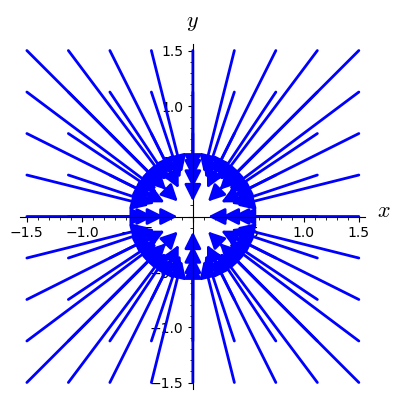

In [48]:
(AAE*(x^2+y^2)).plot(fixed_coords={z: 2.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

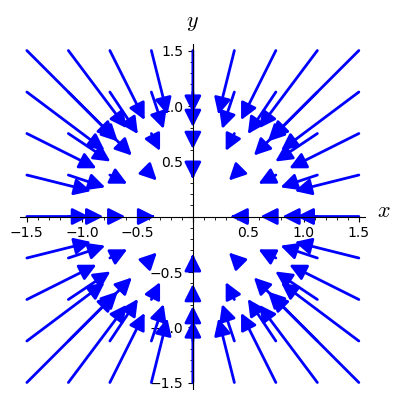

In [49]:
(AAE*(x^2+y^2)).plot(fixed_coords={z: 0}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

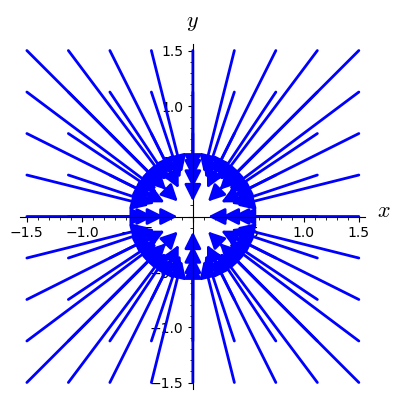

In [50]:
(AAE*(x^2+y^2)).plot(fixed_coords={z: -2.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)